In [1]:
import pandas as pd
dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.10_DecisionTrees/column_2C_weka.csv')
dados

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [2]:
dados.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [3]:
dados.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [4]:
dados.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

array([[<AxesSubplot:title={'center':'degree_spondylolisthesis'}>]],
      dtype=object)

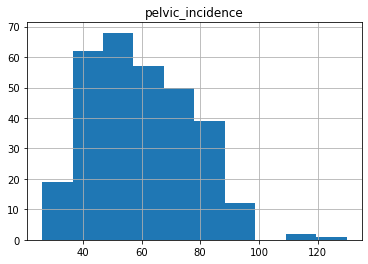

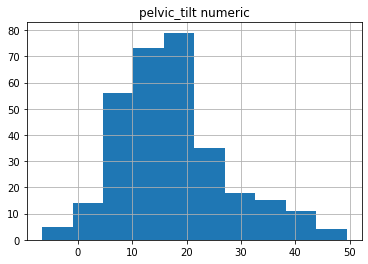

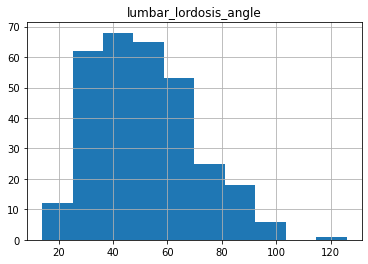

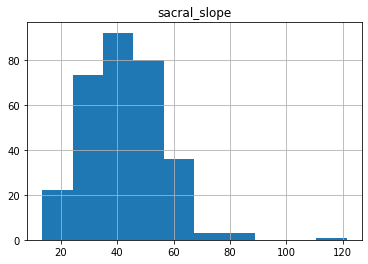

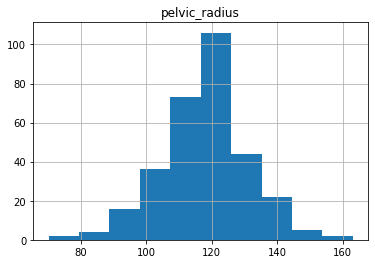

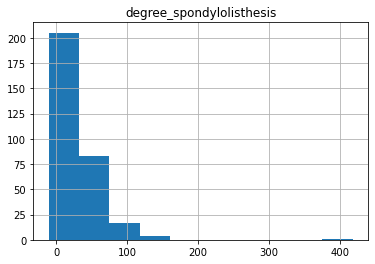

In [5]:
dados.hist('pelvic_incidence')
dados.hist('pelvic_tilt numeric')
dados.hist('lumbar_lordosis_angle')
dados.hist('sacral_slope')
dados.hist('pelvic_radius')
dados.hist('degree_spondylolisthesis')

In [6]:
dados['class']=dados['class'].replace('Abnormal',1)
dados['class']=dados['class'].replace('Normal',0)

In [7]:
dadosx=dados.drop('class', axis=1)
dadosx

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [8]:
dadosy=dados['class']
dadosy

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: class, Length: 310, dtype: int64

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
modelo=DecisionTreeClassifier()
param={'criterion':['gini', 'entropy'],'max_depth':[2,3,4,5,6,7,8,11],
       'min_samples_split':[2,3,4,5,6,9,11]}
otimiza=GridSearchCV(modelo, param_grid=param, cv=5)
otimiza.fit(dadosx,dadosy)
print('Best_param:', otimiza.best_params_)
print('Best_score:', otimiza.best_score_)

Best_param: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 9}
Best_score: 0.7903225806451613
